<a href="https://colab.research.google.com/github/marcel1710/TwitterBot/blob/main/TwitterBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://www.youtube.com/watch?v=ujId4ipkBio

In [3]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')



from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import WordPunctTokenizer

import re

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from google.colab import files
uploaded = files.upload()

Saving credentials.csv to credentials.csv


In [5]:
file = 'credentials.csv'
credentials= pd.read_csv(file)

In [6]:
api_key = credentials['Key'][0]
api_secretkey = credentials['Key'][1]
access_key = credentials['Key'][2]
access_secretkey = credentials['Key'][3]

In [7]:
authenticate = tweepy.OAuthHandler(api_key, api_secretkey)
authenticate.set_access_token(access_key, access_secretkey)
api = tweepy.API(authenticate, wait_on_rate_limit=True) 

In [8]:
posts = api.search(q ='#AAPL', count = 10000, lang = "en", tweet_mode="extended")

print("Last 5 posts: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ')'+ tweet.full_text + '\n')
    i = i+1


Last 5 posts: 

1)AAPL on the waiting list. Any ideas? - #AAPL chart https://t.co/AijeR4aF57

2)AAPL Apple Inc. the real TSLA Tesla competitor - #AAPL chart https://t.co/RUyh2YQTbX

3)Can’t wait to see these first quarter 2021 Apple numbers with all the Apple products I see people flexing for Christmas #AAPL #LetsInvest

4)400 Pips Up from our entry⬆️💯👌🏻

For Free signals, Join https://t.co/gYsp8Dm22B

#crudeoil #PIPS #DJIA #usoil #forex #aapl #DOW #SP500 #ES_F #stocks #xauusd #BTC #fx #SPX #SPY #bitcoin #S&amp;P500 89096 https://t.co/NHECMonyFl

5)RT @f3_designer: Published in 2016: “15 electric cars that will be here by 2020.” Apple came out with an EV last year and we missed it!  🤣…



In [9]:
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns = ['Tweets'])
df.head()

,Tweets
0,AAPL on the waiting list. Any ideas? - #AAPL c...
1,AAPL Apple Inc. the real TSLA Tesla competitor...
2,Can’t wait to see these first quarter 2021 App...
3,400 Pips Up from our entry⬆️💯👌🏻\n\nFor Free si...
4,RT @f3_designer: Published in 2016: “15 electr...


In [10]:
#cleaning text
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    only_alphanumeric = re.sub('[^a-zA-Z0-9]', ' ', user_removed)
    lower_case_tweet = only_alphanumeric .lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

df['Tweets'] = df['Tweets'].apply(clean_tweets)
df.head()


,Tweets
0,aapl on the waiting list any ideas aapl chart ...
1,aapl apple inc the real tsla tesla competitor ...
2,can t wait to see these first quarter 2021 app...
3,400 pips up from our entry for free signals jo...
4,rt designer published in 2016 15 electric cars...


In [11]:
#removing stopwords
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Tweets
0,aapl waiting list ideas aapl chart https co ai...
1,aapl apple inc real tsla tesla competitor aapl...
2,wait see first quarter 2021 apple numbers appl...
3,400 pips entry free signals join https co gysp...
4,rt designer published 2016 15 electric cars 20...


In [12]:
df.dtypes

Tweets    object
dtype: object

aapl waiting list ideas aapl chart https co aijer4af57 aapl apple inc real tsla tesla competitor aapl chart https co ruyh2yqtbx wait see first quarter 2021 apple numbers apple products see people flexing christmas aapl letsinvest 400 pips entry free signals join https co gysp8dm22b crudeoil pips djia usoil forex aapl dow sp500 es f stocks xauusd btc fx spx spy bitcoin amp p500 89096 https co nhecmonyfl rt designer published 2016 15 electric cars 2020 apple came ev last year missed published 2016 15 electric cars 2020 apple came ev last year missed tsla tesla elon apple applecar icar aapl ev bev https co jr12dz1qmn 400 pips entry forex signals join https co ejggzfzx7a pips forex xagusd bitcoin amzn crudeoil spy xauusd aapl es f usoil sp500 btc fx stocks amp p500 spx 44978 https co etin1ofvoe buy 10k aapl tomorrow true https co 9frma9bymq eurgbp tp1 done 70 pips secured free signals join https co bjw5ulaief xauusd spx ger30 pips bitcoin crudeoil usoil dji stocks btc spy es f amp p500 aap

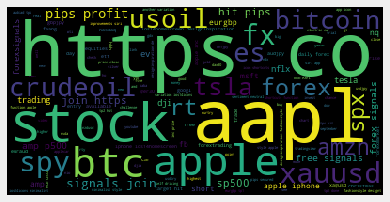

In [14]:
import wordcloud as WordCloud
#df_string['Tweets'] = df['Tweets'].astype(str)

wc_text =  ' '.join(word for word in df['Tweets'])
print(wc_text)

cloud = WordCloud.WordCloud()
cloud.generate(wc_text)

plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')
plt.show()

# We see that https is part of the our wordcloud, we want to remove it as should be stopword

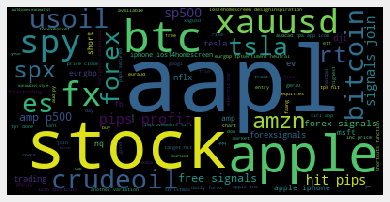

In [16]:
stopwords = list(stop) + ['https'] + ['co']
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df_string = df['Tweets'].astype(str)

wc_text =  ' '.join(word for word in df_string)


cloud = WordCloud.WordCloud()
cloud.generate(wc_text)

plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')
plt.show()


In [17]:
def getSubjectivity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head()

,Tweets,Subjectivity,Polarity
0,aapl waiting list ideas aapl chart aijer4af57,0.000000,0.00
1,aapl apple inc real tsla tesla competitor aapl...,0.300000,0.20
2,wait see first quarter 2021 apple numbers appl...,0.333333,0.25
3,400 pips entry free signals join gysp8dm22b cr...,0.800000,0.40
4,rt designer published 2016 15 electric cars 20...,0.066667,0.00


In [18]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,aapl waiting list ideas aapl chart aijer4af57,0.000000,0.00,Neutral
1,aapl apple inc real tsla tesla competitor aapl...,0.300000,0.20,Positive
2,wait see first quarter 2021 apple numbers appl...,0.333333,0.25,Positive
3,400 pips entry free signals join gysp8dm22b cr...,0.800000,0.40,Positive
4,rt designer published 2016 15 electric cars 20...,0.066667,0.00,Neutral


In [19]:
#sortiert und print positiv
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) aapl apple inc real tsla tesla competitor aapl chart ruyh2yqtbx

2) wait see first quarter 2021 apple numbers apple products see people flexing christmas aapl letsinvest

3) 400 pips entry free signals join gysp8dm22b crudeoil pips djia usoil forex aapl dow sp500 es f stocks xauusd btc fx spx spy bitcoin amp p500 89096 nhecmonyfl

4) buy 10k aapl tomorrow true 9frma9bymq

5) eurgbp tp1 done 70 pips secured free signals join bjw5ulaief xauusd spx ger30 pips bitcoin crudeoil usoil dji stocks btc spy es f amp p500 aapl sp500 fx forex 9598 d5c25adyia

6) eurgbp tp1 done 70 pips secured join free signals jihwmpgw5d amp p500 fx spy es f sp500 usoil pips ger30 forex spx dji xauusd aapl btc bitcoin crudeoil stocks 40697 z9usruf42w

7) wow beautiful menu reading beautiful phone aapl

8) rt audcad tps hit 70 pips profit free signals join pxlbnt0aio forex aapl sp500 fx amp p50

9) audcad tps hit 70 pips profit free signals join pxlbnt0aio forex aapl sp500 fx amp p500 es f usoil dow bitcoin btc

In [20]:
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) bad news tesla tsla aapl puilesa3f7

2) mistake today aapl underlined instead taking qqq weakness short entry signal trying anticipate fail hod waited reversal candle appear darkcloudcover engulfingcandle etc lessonlearned 1y9ej2fdaa

3) aapl short 114 115 pton short 114 also tsla short 545 595 min loss 140 points combined plus spy qqq shorts 6 10 losses addition holy crap destroys 1 2 years work real money ass

4) improvements siri app icon shortcuts function apple iphone ios14homescreen designinspiration designthinking aapl edtech twitch startup ios14 designtalk jailbreak robloxdev shit bot 8qthkwtqhg



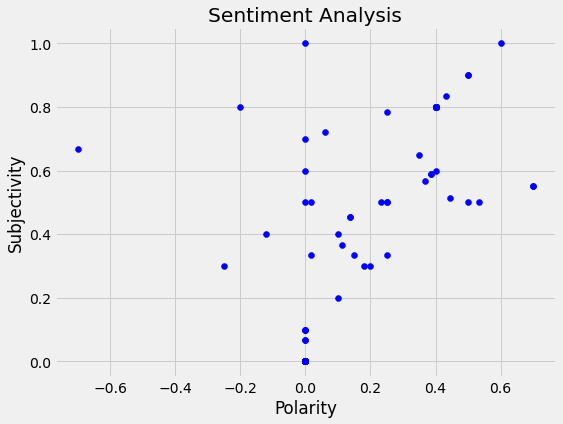

In [21]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [22]:
percentage_positive = df[df.Analysis =='Positive']
percentage_positive = percentage_positive['Tweets']
#float zu string damit % print geht

print(str(round( (percentage_positive.shape[0] / df.shape[0]) * 100, 1))+"% are positive tweets")


42.0% are positive tweets


In [23]:
percentage_negative = df[df.Analysis =='Negative']
percentage_negative = percentage_negative['Tweets']
#float zu string damit % print geht

print(str(round( (percentage_negative.shape[0] / df.shape[0]) * 100, 1))+"% are negative tweets")

4.0% are negative tweets


In [24]:
percentage_neutral = 100 - round( (percentage_positive.shape[0] / df.shape[0]) * 100, 1) -round( (percentage_negative.shape[0] / df.shape[0]) * 100, 1)
percentage_neutral = str(round(percentage_neutral , 2))
print(percentage_neutral + "% are neutral tweets")

54.0% are neutral tweets


<function matplotlib.pyplot.show>

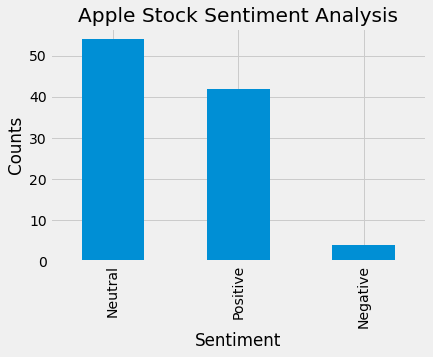

In [25]:
df['Analysis'].value_counts()

plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show

In [26]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 19.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=a34889b112f5b0dab978c44b4340fcd037e44b66fd0a2cb87a23b97adee9c019
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [27]:
import yfinance as yf
from pandas_datareader import data

In [28]:
ticker = ['AAPL']
#YYYY-MM-DD
start= '2019-01-01'
end= '2019-12-31'
stock = pd.DataFrame(yf.download(ticker,start,end))
#positive differenz = aktie gestiegen, negative differenz aktie gesunken
stock['Difference'] = stock['Adj Close']-stock['Open']
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Difference
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.562561,148158800,-0.159939
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.721451,365248800,-1.273548
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.203678,234428400,0.071178
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.123104,219111200,-1.051895
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.811718,164101200,-0.578281


In [29]:
#für folgende parts https://alexandrenesovic.com/2019/11/17/how-to-find-import-and-plot-historical-financial-data-with-yfinance-python-and-how-to-calculate-the-daily-returns/
apple_daily_returns = ((stock['Adj Close'] / stock['Adj Close'].shift(1)) - 1)*100


apple_daily_returns = apple_daily_returns.to_frame()
apple_daily_returns.columns = ['Daily Return in %']

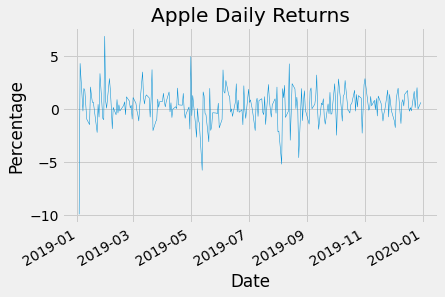

In [30]:
apple_daily_returns['Daily Return in %'].plot(linewidth = 0.5)
plt.title('Apple Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

In [32]:
!pip install twitterscraper
from twitterscraper import query_tweets
from twitterscraper.query import query_tweets_from_user
import datetime as dt 

     |████████████████████████████████| 92kB 4.3MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11347 sha256=a8f8b382c3610cbc57ff04cde6ec4042b2395529c1f0db6529e4e57e052d3670
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper


In [2]:
!pip install twint
import twint

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [4]:
t = twint.Config()
t.Search = "analytics"

t.Store_object = True

t.Limit = 10
twint.run.Search(t)

tlist = t.search_tweet_list

print(tlist)

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs


KeyboardInterrupt: ignored